In [ ]:
!pip install ultralytics kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("duydieunguyen/licenseplates")
path


100%|██████████| 959M/959M [00:07<00:00, 130MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1'

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk(path):
    print(f"Directory: {dirpath}")
    if dirnames:
        print(f"  Subdirectories: {dirnames}")
    if filenames:
        print(f"  Files: {filenames}")
    print("\n")

Directory: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1
  Subdirectories: ['labels', 'images']
  Files: ['dataset.yaml']


Directory: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/labels
  Subdirectories: ['train', 'test', 'val']


Directory: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/labels/train
  Files: ['Dieu_0251.txt', 'Dieu_0004.txt', 'greenpack_1026.txt', 'Dieu_0010.txt', 'greenpack_1576.txt', 'greenpack_0170.txt', 'Tgmt_0354.txt', 'greenpack_1550.txt', 'carlong_0908.txt', 'greenpack_0945.txt', 'greenpack_1216.txt', 'greenpack_0062.txt', 'carlong_0739.txt', 'greenpack_0543.txt', 'greenpack_1552.txt', 'greenpack_0441.txt', 'carlong_0624.txt', 'Tgmt_0157.txt', 'greenpack_0721.txt', 'greenpack_0878.txt', 'carlong_0914.txt', 'carlong_0031.txt', 'Tgmt_0876.txt', 'greenpack_1281.txt', 'carlong_0757.txt', 'Tgmt_0765.txt', 'greenpack_0906.txt', 'Dieu_0471.txt', 'Dieu_0488.txt', 'carlong_0913.txt', 'Tgmt_0748.

In [ ]:
import yaml
import os

dataset_yaml_path = os.path.join(path, 'dataset.yaml')

with open(dataset_yaml_path, 'r') as file:
    dataset_config = yaml.safe_load(file)

print("Dataset Configuration:")
print(dataset_config)

Dataset Configuration:
{'train': 'TongHop\\YOLODataset/images/train/', 'val': 'TongHop\\YOLODataset/images/val/', 'test': 'TongHop\\YOLODataset/images/test/', 'nc': 2, 'names': ['BSD', 'BSV']}


In [ ]:
import os

# Update the 'train' path
dataset_config['train'] = os.path.join(path, 'images', 'train')

# Update the 'val' path
dataset_config['val'] = os.path.join(path, 'images', 'val')

# Update the 'test' path
dataset_config['test'] = os.path.join(path, 'images', 'test')

# Now, let's also update the 'labels' paths in the dataset_config for consistency, assuming they follow a similar structure relative to the main path.
# The current dataset.yaml only has image paths, so we will create label paths based on the structure shown in `os.walk`.
dataset_config['train_labels'] = os.path.join(path, 'labels', 'train')
dataset_config['val_labels'] = os.path.join(path, 'labels', 'val')
dataset_config['test_labels'] = os.path.join(path, 'labels', 'test')

print("Updated Dataset Configuration:")
print(dataset_config)


Updated Dataset Configuration:
{'train': '/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/images/train', 'val': '/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/images/val', 'test': '/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/images/test', 'nc': 2, 'names': ['BSD', 'BSV'], 'train_labels': '/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/labels/train', 'val_labels': '/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/labels/val', 'test_labels': '/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/labels/test'}


In [ ]:
import yaml
import os

# Define the path where the updated dataset.yaml will be saved
updated_dataset_yaml_path = os.path.join(path, 'dataset.yaml')

# Save the updated configuration back to the dataset.yaml file
with open(updated_dataset_yaml_path, 'w') as file:
    yaml.dump(dataset_config, file, default_flow_style=False)

print(f"Updated dataset.yaml saved to: {updated_dataset_yaml_path}")

Updated dataset.yaml saved to: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/dataset.yaml


In [ ]:
from ultralytics import YOLO

# Instantiate a YOLO model with pre-trained 'yolov8n.pt' weights
model = YOLO('yolov8n.pt')

print("YOLO model loaded successfully.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO model loaded successfully.


In [ ]:
model.train(data=updated_dataset_yaml_path, epochs=100, imgsz=640, batch=16, name='yolov8n_custom')

print("YOLO model training initiated.")

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ove

✅ Model loaded successfully!

Please click 'Choose Files' to upload an image...


Saving 0003_07398_b.jpg to 0003_07398_b.jpg

Processing: 0003_07398_b.jpg...

image 1/1 /content/0003_07398_b.jpg: 416x640 1 BSV, 9.5ms
Speed: 3.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/runs/detect/predict3
Result saved at: /content/runs/detect/predict3/0003_07398_b.jpg


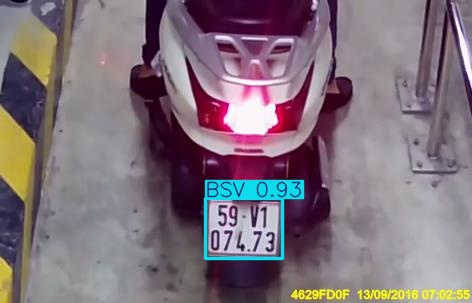

In [ ]:
from google.colab import files
from ultralytics import YOLO
import os # Import os module
from IPython.display import Image, display # Import Image from IPython.display for displaying images from file paths

# 1. Load the trained model
# The trained model 'best.pt' is saved in the run directory from the previous training step.
# The output from training shows it was saved to '/content/runs/detect/yolov8n_custom/weights/best.pt'
model_path = '/content/runs/detect/yolov8n_custom/weights/best.pt'

if not os.path.exists(model_path):
    print(f"⚠️ Warning: Model not found at {model_path}. Please make sure training completed successfully.")
else:
    model = YOLO(model_path) # Load model using the correct full path
    print("✅ Model loaded successfully!")

    # 2. Trigger the file upload widget
    print("\nPlease click 'Choose Files' to upload an image...")
    uploaded = files.upload()

    # 3. Run detection on uploaded images
    for filename in uploaded.keys():
        print(f"\nProcessing: {filename}...")

        # Run inference and save results
        # 'save=True' will save the annotated image to a 'predict' directory within the run folder
        results = model.predict(source=filename, conf=0.25, save=True)

        # Display the result
        for result in results:
            # Get the directory where results are saved (e.g., /content/runs/detect/predict)
            save_dir = result.save_dir
            # Construct the full path to the saved annotated image
            result_img_name = os.path.basename(result.path) # Get the filename from the result object
            result_img_path = os.path.join(save_dir, result_img_name)

            print(f"Result saved at: {result_img_path}")
            # Display the saved image directly using IPython.display.Image
            display(Image(result_img_path))
